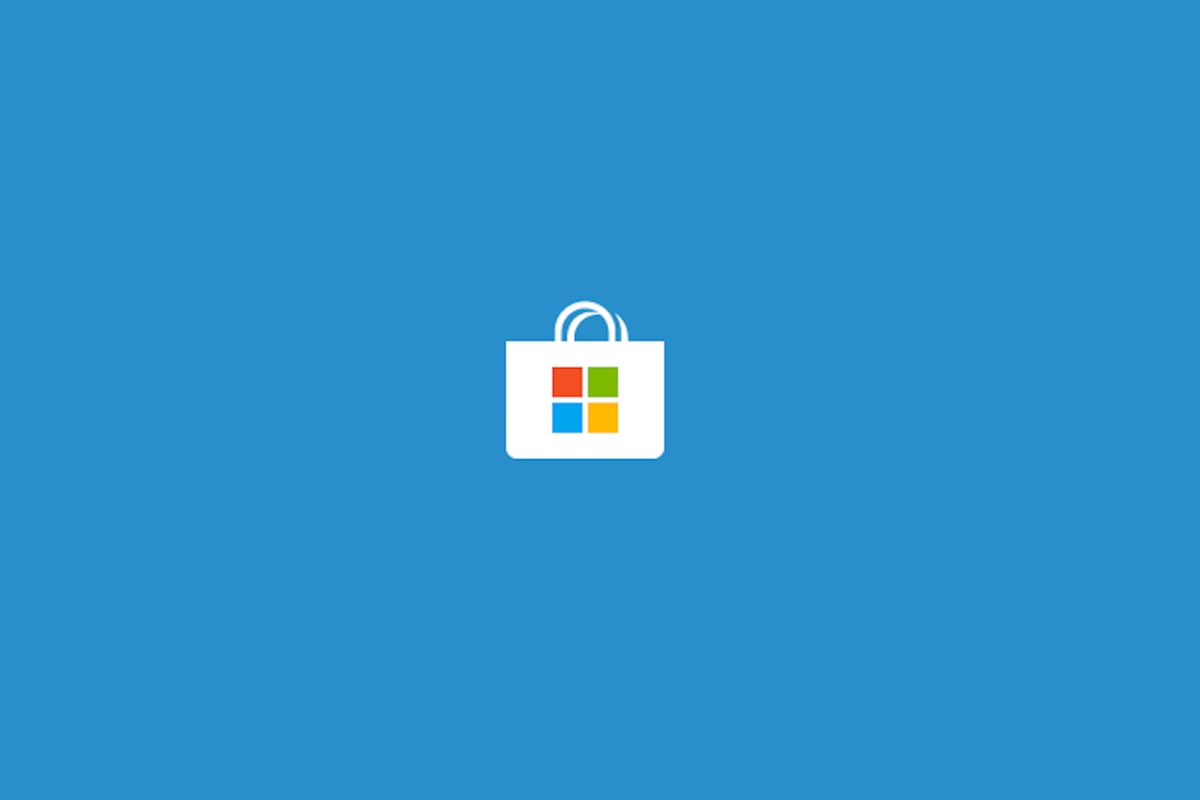

# Microsoft Store (formerly known as Windows Store) is a digital distribution platform owned by Microsoft. It started as an app store for Windows 8 and Windows Server 2012 as the primary means of distributing Universal Windows Platform (UWP) apps. With Windows 10, Microsoft merged its other distribution platforms (Windows Marketplace, Windows Phone Store, Xbox Music, Xbox Video, Xbox Store, and a web storefront also known as "Microsoft Store") into Microsoft Store, making it a unified distribution point for apps, console games, and digital videos. Digital music was included until the end of 2017, and E-books were included until 2019.[1] Some content is available free of charge from the store.

# In 2015, over 669,000 apps were available on the store. Categories containing the largest number of apps are "Books and Reference", "Education", "Entertainment", and "Games". The majority of the app developers have one app.

# As with other similar platforms, such as the Google Play and Mac App Store

# If you like, please upvote

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Load The Dataset
dataset = pd.read_csv("/kaggle/input/windows-store/msft.csv")

In [ ]:
# First 5 row of Dataset
dataset.head()

In [ ]:
# Dataset Shape
dataset.shape

In [ ]:
# Information of Dataset
dataset.info()

In [ ]:
# Drop the null row
dataset.drop(5321, axis=0, inplace=True)

In [ ]:
# Data cleaning
def change_form_of_value(Value):
    change = Value.replace("₹", "")
    if "Free" in change:
        change = change.replace("Free","0")
    elif "," in change:
        change = change.replace(",","")
    return change

In [ ]:
dataset["Price"] = dataset["Price"].apply(lambda x: change_form_of_value(x))

In [ ]:
dataset["Price"] = dataset["Price"].astype("float")

In [ ]:
# import visualize package
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Frequency Rated App
sns.set(style="darkgrid", palette='Set1')
plt.subplots(figsize=(10,6))
sns.countplot(x=dataset["Rating"])
plt.title("Frequency Of Rated App In Microsoft Windows Store", fontweight="bold")

In [ ]:
# Free Vs Paid Apps
free_app = round((dataset["Price"] == 0).sum() / len(dataset.index) * 100)
paid_app = round((dataset["Price"] != 0).sum() / len(dataset.index) * 100)

In [ ]:
print(f"In Windows Store there are {free_app} % and paid app {paid_app} %")

In [ ]:
# Display Pie Chart
fig, ax = plt.subplots(figsize=(10,6))
data = [free_app, paid_app]
labels = ["Free Apps", "Paid Apps"]

def valueFunc(val):

    return "{:.1f}%".format(val)

ax.pie(data, autopct=lambda val: valueFunc(val),
                                  textprops=dict(color="w"), colors=["#ff6347", "#333333"])
ax.legend(labels)
ax.set_title("Percentage of Free and Paid Apps In Windows Store", fontweight="bold")

In [ ]:
# Paid Apps
dataset[dataset["Price"] != 0.0]

In [ ]:
# Unique value for category
dataset["Category"].unique()

In [ ]:
# paid books name according to category
def paid_books(category_name):
    plt.subplots(figsize=(10,20))
    a = dataset[(dataset["Category"] == category_name) & (dataset["Price"] != 0.0)]
    sns.barplot(x=a["Price"], y=a["Name"])
    plt.title(f"Paid Books Category: {category_name}")

In [ ]:
paid_books("Books")

In [ ]:
paid_books("Developer Tools")

In [ ]:
# Percentage of free books category
new = dataset.loc[dataset["Price"] == 0.0]
total_free_app = len(new)
total_free_app_percentage = (new["Category"].value_counts() / total_free_app) * 100

In [ ]:
total_free_app_percentage

In [ ]:
# visualize free books percentage
fig, ax = plt.subplots(figsize=(15,8))
def valueFunc(val):
    return "{:.1f}%".format(val)

ax.pie(x=total_free_app_percentage, autopct=lambda val: valueFunc(val), textprops=dict(color="black"));
ax.legend(total_free_app_percentage.index, loc='center', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Free Books Categorical Percentage", fontweight="bold")

# Most of Music Apps are free to use. Its around (15%)

In [ ]:
# paid books percentage
new = dataset.loc[dataset["Price"] > 0.0]
total_paid_app = len(new)
total_paid_app_percentage = (new["Category"].value_counts() / total_free_app) * 100

In [ ]:
# visualize paid books percentage
fig, ax = plt.subplots(figsize=(15,8))

def valueFunc(val):
    return "{:.1f}%".format(val)

ax.pie(x=total_paid_app_percentage, autopct=lambda val: valueFunc(val), textprops=dict(color="black"));
ax.legend(total_paid_app_percentage.index, loc='center', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Paid Books Categorical Percentage", fontweight="bold")

# Category: Books, Business, Developer Tools Apps are paid

# If you like, please upvote